# Image Segmentation with $k$-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

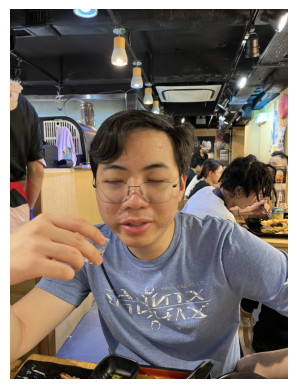

Shape: (4032, 3024, 3)


In [2]:
PATH = "./image.png"
image = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

print("Shape:", image.shape)

In [3]:
# reshape image to 2D array (each row contains RGB values)
pixels = np.float32(image.reshape((-1, 3)))
print(pixels.shape)

(12192768, 3)


In [4]:
# define criteria for stopping the algorithm
# max_iter: maximum number of iterations
# epsilon: maximum distance between new centers and old centers
MAX_ITER = 100
EPSILON = 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, MAX_ITER, EPSILON)

In [5]:
# perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print("Centers:")
for c in centers:
    print("\t{}".format(c))
print("Shape of labels:", labels.shape)

Centers:
	[32.53112  29.706224 27.27487 ]
	[85.33225  80.814064 83.656395]
	[163.23901 115.86393  79.43043]
	[201.30237 204.92245 204.29453]
	[207.54138 165.84375 120.20111]
	[124.18042 131.15482 150.68091]
Shape of labels: (12192768, 1)


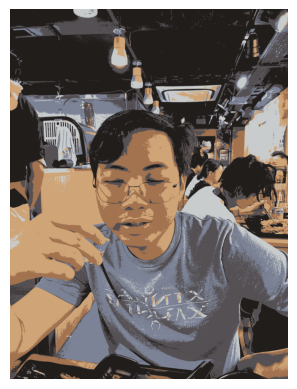

In [6]:
# get original image with labels
centers = np.uint8(centers)
segmented_image = centers[labels.ravel()].reshape((image.shape))

# show segmented image
plt.imshow(segmented_image)
plt.axis("off")
plt.show()

In [10]:
# append black color to centers
centers_new = np.append(centers, [[0, 0, 0]], axis = 0)

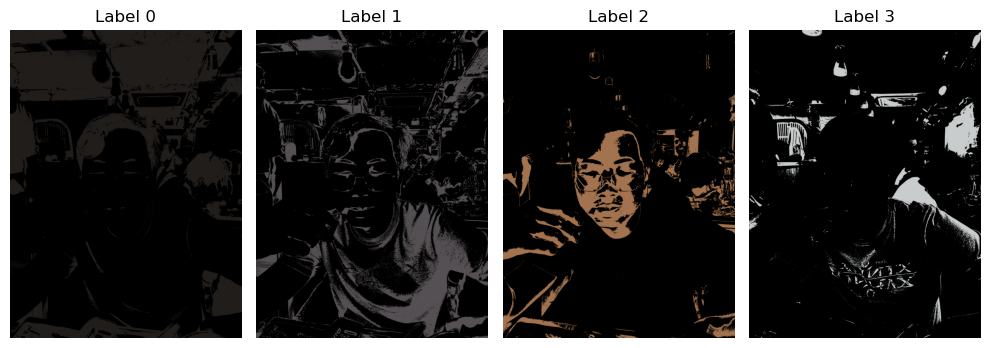

In [11]:
# plot different labels
fig, ax = plt.subplots(1, 4, figsize = (10, 5))
for i in range(4):
    labels_new = labels.copy()
    labels_new[labels_new != i] = k
    ax[i].imshow(centers_new[labels_new.ravel()].reshape((image.shape)))
    ax[i].set_title("Label {}".format(i))
    ax[i].axis("off")
plt.tight_layout()
plt.show()